In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import os
import json
from pathlib import Path

In [2]:
def func(object_name):
    if "." in object_name:
        return False
    else:
        return True

In [5]:
E = 5
R = 500
N = 300
dataset = "cifar10"
alpha = 1

folder_path = f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/E{E}/R{R}"
algos = filter(func, sorted(os.listdir(folder_path)))
algos = list(algos)
algos

['fedavg', 'fednova', 'fedprox']

### Global Accuracy

In [8]:
data = {algo: [] for algo in algos}
for algo in algos:
    global_cfmtx = json.load(open(os.path.join(folder_path, algo, "global_cfmtx_record.json"), "r"))
    for r in range(len(global_cfmtx)):
        data[algo].append(np.mean(np.diag(global_cfmtx[r])))
        
fim = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "fim", "results.json"), "r"))
sset = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "singleset", "results.json"), "r"))

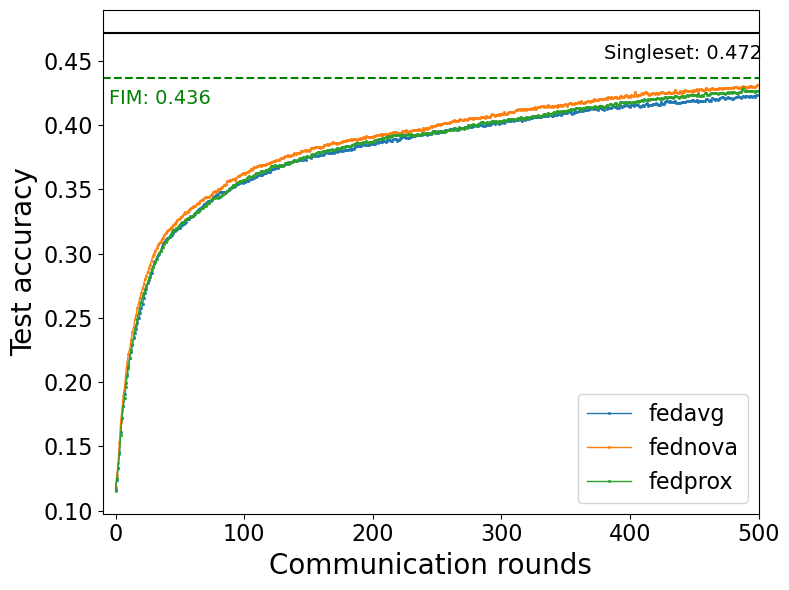

In [13]:
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

plt.figure(figsize=(8,6))
plt.xlabel("Communication rounds", fontsize=20)
plt.ylabel("Test accuracy", fontsize=20)

for algo in data.keys():
    plt.plot(data[algo], label=algo.replace("_", " "),
            linestyle='solid', marker='s',
            linewidth=1, markersize=1)
    
plt.axhline(y=fim['fim'], xmin=0, xmax=1000, linestyle='--', color='green')
plt.text(x=-5, y=fim['fim']-0.02, s=f"FIM: {fim['fim']:>.3f}", fontdict={"fontsize":14, "color": "green"})

plt.axhline(y=sset['fin_acc'], xmin=0, xmax=1000, linestyle='-', color='black')
plt.text(x=R-120, y=sset['fin_acc']-0.02, s=f"Singleset: {sset['fin_acc']:>.3f}", fontdict={"fontsize":14})
    
# plt.ylim(0.1,1)
plt.xlim(-10,R)
plt.legend(loc="lower right", fontsize=16, ncol=1)
plt.tight_layout()
plt.savefig(folder_path + f"/{R}-round Global_Accuracy.png")

### FIM analysis

In [3]:
E = 5
R = 100
N = 100
dataset = "cifar10"
alpha = 0.1

folder_path = f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/E{E}/R{R}"
algos = filter(func, sorted(os.listdir(folder_path)))
algos = list(algos)
algos

['fedavg_fim', 'fednova_fim']

In [16]:
import pandas as pd

data = {algo: [] for algo in algos}
for algo in algos:
    global_cfmtx = json.load(open(os.path.join(folder_path, algo, "global_cfmtx_record.json"), "r"))
    for r in range(len(global_cfmtx)):
        data[algo].append(np.mean(np.diag(global_cfmtx[r])))
        
fim = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "fim", "results.json"), "r"))
# sset = json.load(open(os.path.join(f"./jsons/dataset_idx/{dataset}/dirichlet/dir_{alpha}_sparse/{N}client/", "singleset", "results.json"), "r"))

df = pd.DataFrame(data).iloc[-2:]
df.index = pd.Index(['origin', '+fim'])

df['fim'] = [fim['centroid'], fim['fim']]
df

,fedavg_fim,fednova_fim,fim
origin,0.3494,0.3466,0.2148
+fim,0.3623,0.3437,0.3322


<AxesSubplot:>

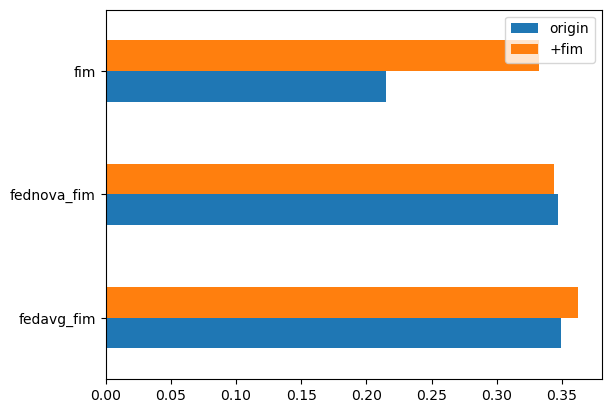

In [17]:
df.T.plot.barh()